In [1]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# Topic - Tweets posted by Trump : Analyze the data sentiments of the Trump tweets

# Link to dataset
# After approval of the Lecturer we selected the dataset

# Drive Link : https://drive.google.com/file/d/1RSnIkqX-aZS9RRoWKSaZIEMwu3DlqBA1/view?usp=sharing

# Link : https://data.world/lovesdata/trump-tweets-5-4-09-12-5-16

In [2]:
# Contributions to the Assignment

## Exclude KNN,NB,SVM models, all other objectives done by dividing same weight among all 3 members 
#

# IT18052466 - Alwis P L D N  - Created Support Vector Machine model
#                                               -

# IT18164404 - Suwandarachchi T D  - Created Naive Bayes model
#                                               -

# IT18165180 - Hewagama K G  - Created  K-Nearest Neighbors model
#                                               -


In [3]:
# Importing libraries
import re
import nltk
import numpy as np
import pandas as pd
from sklearn import svm
from pathlib import Path
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [37]:
# Importing data set
df = pd.read_csv('2017_01_28_trump_tweets.csv',sep = ',')

In [5]:
# Displaying data set
df.head()

,date,time,tweet,client,client_simplified
0,2017-01-27,18:46:22,I promise that our administration will ALWAYS...,Twitter for iPhone,Twitter for iPhone
1,2017-01-27,17:00:47,Congratulations Secretary Mattis! https://t.c...,Twitter for iPhone,Twitter for iPhone
2,2017-01-27,15:20:15,Statement on International Holocaust Remembra...,Twitter for iPhone,Twitter for iPhone
3,2017-01-27,11:30:29,.@VP Mike Pence will be speaking at today's #...,Twitter for iPhone,Twitter for iPhone
4,2017-01-27,11:27:02,The #MarchForLife is so important. To all of ...,Twitter for iPhone,Twitter for iPhone


In [6]:
# Counting no.of Rows and no.of columns
df.shape

(30385, 5)

In [7]:
# Select the relevant columns for the whole dataset
df = df[['client_simplified','tweet']]

# Displaying selected columns
df.head()

,client_simplified,tweet
0,Twitter for iPhone,I promise that our administration will ALWAYS...
1,Twitter for iPhone,Congratulations Secretary Mattis! https://t.c...
2,Twitter for iPhone,Statement on International Holocaust Remembra...
3,Twitter for iPhone,.@VP Mike Pence will be speaking at today's #...
4,Twitter for iPhone,The #MarchForLife is so important. To all of ...


In [8]:
# Get the columns information 
# Check whether there are null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30385 entries, 0 to 30384
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   client_simplified  30385 non-null  object
 1   tweet              30385 non-null  object
dtypes: object(2)
memory usage: 474.9+ KB


In [9]:
# Making four classes for client_simplified classification
# "Twitter for iPhone" means (0) 
# "Twitter for Android" means (1)
# "Twitter Web Client" means (2)
# "Other" means (3)
# These are the four types of clients we got
def replaceClient(client):
    if client == ("Twitter for iPhone") :
        return 0
    if client == ("Twitter for Android") :
        return 1
    if client == ("Twitter Web Client") :
        return 2
    else:
        return 3    
df['client_simplified'] = df['client_simplified'].apply(replaceClient)

In [10]:
# Select the relevant columns from the dataset
df = df[['client_simplified','tweet']]

# Displaying selected columns
df.head()

,client_simplified,tweet
0,0,I promise that our administration will ALWAYS...
1,0,Congratulations Secretary Mattis! https://t.c...
2,0,Statement on International Holocaust Remembra...
3,0,.@VP Mike Pence will be speaking at today's #...
4,0,The #MarchForLife is so important. To all of ...


In [11]:
# Select most tweeted device by the cilent
df['client_simplified'].min() 

0

In [12]:
# Select least tweeted device by the cilent
df['client_simplified'].max() 

3

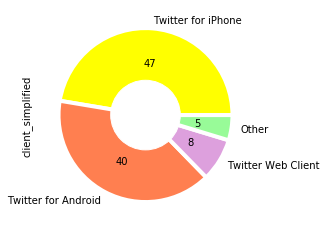

In [13]:
# Assigning names that should tag
names = 'Twitter for iPhone', 'Twitter for Android', 'Twitter Web Client', 'Other'

# Creating the white inner circle
my_circle=plt.Circle( (0,0), 0.4, color='white')

# Plotting the pie chart(Doughnut chart)
df.client_simplified.value_counts().plot( labels = names, kind = 'pie', autopct = '%1.0f', colors = ["yellow", "coral", "plum", "palegreen"], wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' }).add_artist( my_circle)

In [14]:
# Seperate tweet text from panda frame in order to cleaning process
tweet = df.iloc[:,1].values
client_simplified = df.iloc[:,0].values

In [15]:
# Checking the values represented in tweet lines
tweet

array([' I promise that our administration will ALWAYS have your back. We will ALWAYS be with you! https://t.co/D0aOWhOH4X',
       ' Congratulations Secretary Mattis! https://t.co/mkuhbegzqS',
       ' Statement on International Holocaust Remembrance Day: https://t.co/KjU0MOxCHk',
       ...,
       'Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!',
       'Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!',
       'Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!'],
      dtype=object)

In [16]:
# Checking the values represented in client lines
client_simplified

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [17]:
# Clean the datasets 
# Removing any special characters, html tags

# Creating a new list to store Cleaned data
WordsArray = []

for word in range(0, len(tweet)):    
    
    # Remove urls, links and clean unnecssary values
    TextWordsArray = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', ' ', str(tweet[word]), flags=re.MULTILINE)    
    
    # Remove all the special characters
    TextWordsArray = re.sub(r'\W', ' ', TextWordsArray)

    
    # Remove all single characters
    TextWordsArray= re.sub(r'\s+[a-zA-Z]\s+', ' ', TextWordsArray)

    # Remove single characters from the start
    TextWordsArray = re.sub(r'\^[a-zA-Z]\s+', ' ', TextWordsArray)
    
    # Substituting multiple spaces with single space
    TextWordsArray = re.sub(r'\s+', ' ', TextWordsArray, flags=re.I)
    

    
    # Converting to Lowercase
    TextWordsArray = TextWordsArray.lower()
    
    # Appending cleaned text to the array
    WordsArray.append(TextWordsArray)

In [18]:
# Checking the values represented in WordsArray array
WordsArray

[' promise that our administration will always have your back we will always be with you ',
 ' congratulations secretary mattis ',
 ' statement on international holocaust remembrance day ',
 ' vp mike pence will be speaking at today marchforlife you have our full support ',
 ' the marchforlife is so important to all of you marching you have my full support ',
 ' mexico has taken advantage of the s for long enough massive trade deficits little help on the very weak border must change now ',
 ' look forward to seeing final results of votestand gregg phillips and crew say at least 03 000 000 votes were illegal we must do better ',
 ' miami dade mayor drops sanctuary policy right decision strong ',
 ' will be interviewed by seanhannity on foxnews at 10 00pm tonight enjoy ',
 ' spoke at the congressional gop retreat in philadelphia pa this afternoon vp senatemajldr speakerryan th ',
 ' of jobs and companies lost if mexico is unwilling to pay for the badly needed wall then it would be better

In [19]:
# Functions that make matplotlib work like MATLAB
import matplotlib.pyplot as pPlot

# Create and generate a word cloud image
# Display the generated image
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image

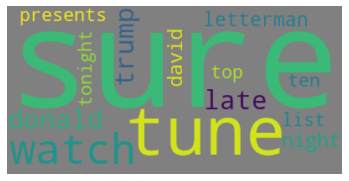

In [20]:
# Creating a wordcloud
wordcloud = WordCloud(max_font_size=400, max_words=150, background_color="gray").generate(TextWordsArray)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("on")
plt.axis("off")
plt.show()

In [21]:
# Tokenization of tweet texts uisng nltk word_tokenize
# Tokenize the corpus
tokens = [] 

for words in range(0, len(WordsArray)):
    
    token = nltk.word_tokenize(WordsArray[words])

    tokens.append(token)

In [22]:
# Checking the values represented in token Tokenizer
token

['be',
 'sure',
 'to',
 'tune',
 'in',
 'and',
 'watch',
 'donald',
 'trump',
 'on',
 'late',
 'night',
 'with',
 'david',
 'letterman',
 'as',
 'he',
 'presents',
 'the',
 'top',
 'ten',
 'list',
 'tonight']

In [23]:
# Removing stop words from tokenized text
stop_words = stopwords.words('english')
def remove_stop_words(df):
    removed_stop_words = []
    for tweet in df:
        removed_stop_words.append(
            [word for word in tweet
                      if word not in stop_words])
    return removed_stop_words

no_stop_words = remove_stop_words(tokens)

In [26]:
# Checking the values represented in stop_words array
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# Apply the stemming text uisng poter's stemmer
ps = PorterStemmer()

stemmed_tokens = []

#  Stemming the tokens
for wordsA in no_stop_words:
    stemmed_sub_array = []
    for word in wordsA:
        stemmed_sub_array.append(ps.stem(word))
    stemmed_tokens.append(stemmed_sub_array)
    

In [28]:
# Checking the values represented in stemmed_tokens array
stemmed_tokens

[['promis', 'administr', 'alway', 'back', 'alway'],
 ['congratul', 'secretari', 'matti'],
 ['statement', 'intern', 'holocaust', 'remembr', 'day'],
 ['vp', 'mike', 'penc', 'speak', 'today', 'marchforlif', 'full', 'support'],
 ['marchforlif', 'import', 'march', 'full', 'support'],
 ['mexico',
  'taken',
  'advantag',
  'long',
  'enough',
  'massiv',
  'trade',
  'deficit',
  'littl',
  'help',
  'weak',
  'border',
  'must',
  'chang'],
 ['look',
  'forward',
  'see',
  'final',
  'result',
  'votestand',
  'gregg',
  'phillip',
  'crew',
  'say',
  'least',
  '03',
  '000',
  '000',
  'vote',
  'illeg',
  'must',
  'better'],
 ['miami',
  'dade',
  'mayor',
  'drop',
  'sanctuari',
  'polici',
  'right',
  'decis',
  'strong'],
 ['interview', 'seanhann', 'foxnew', '10', '00pm', 'tonight', 'enjoy'],
 ['spoke',
  'congression',
  'gop',
  'retreat',
  'philadelphia',
  'pa',
  'afternoon',
  'vp',
  'senatemajldr',
  'speakerryan',
  'th'],
 ['job',
  'compani',
  'lost',
  'mexico',
  '

In [29]:
# Applyning lemmatizing
lemmatizer = WordNetLemmatizer()

lemmatized_tokens = []

# Lemmatizing the tokens
for wordsA in stemmed_tokens:
    lemmatized_sub_array = []
    for word in wordsA:
        lemmatized_sub_array.append(lemmatizer.lemmatize(word))
    lemmatized_tokens.append(lemmatized_sub_array)

In [30]:
# Checking the values represented in lemmatized_tokens array
lemmatized_tokens

[['promis', 'administr', 'alway', 'back', 'alway'],
 ['congratul', 'secretari', 'matti'],
 ['statement', 'intern', 'holocaust', 'remembr', 'day'],
 ['vp', 'mike', 'penc', 'speak', 'today', 'marchforlif', 'full', 'support'],
 ['marchforlif', 'import', 'march', 'full', 'support'],
 ['mexico',
  'taken',
  'advantag',
  'long',
  'enough',
  'massiv',
  'trade',
  'deficit',
  'littl',
  'help',
  'weak',
  'border',
  'must',
  'chang'],
 ['look',
  'forward',
  'see',
  'final',
  'result',
  'votestand',
  'gregg',
  'phillip',
  'crew',
  'say',
  'least',
  '03',
  '000',
  '000',
  'vote',
  'illeg',
  'must',
  'better'],
 ['miami',
  'dade',
  'mayor',
  'drop',
  'sanctuari',
  'polici',
  'right',
  'decis',
  'strong'],
 ['interview', 'seanhann', 'foxnew', '10', '00pm', 'tonight', 'enjoy'],
 ['spoke',
  'congression',
  'gop',
  'retreat',
  'philadelphia',
  'pa',
  'afternoon',
  'vp',
  'senatemajldr',
  'speakerryan',
  'th'],
 ['job',
  'compani',
  'lost',
  'mexico',
  '

In [31]:
# Convert the tokens into tf-idf weights
# Define a function to get the sentence againg
# To calculate tf_idf values, need to join all the reviwes 
def join(tokens_to_text):
      return [' '.join(
          [word for word in tweet]) 
              for tweet in tokens_to_text]
    
join_output = join(lemmatized_tokens)

In [32]:
# Checking the values represented in join_output array
join_output

['promis administr alway back alway',
 'congratul secretari matti',
 'statement intern holocaust remembr day',
 'vp mike penc speak today marchforlif full support',
 'marchforlif import march full support',
 'mexico taken advantag long enough massiv trade deficit littl help weak border must chang',
 'look forward see final result votestand gregg phillip crew say least 03 000 000 vote illeg must better',
 'miami dade mayor drop sanctuari polici right decis strong',
 'interview seanhann foxnew 10 00pm tonight enjoy',
 'spoke congression gop retreat philadelphia pa afternoon vp senatemajldr speakerryan th',
 'job compani lost mexico unwil pay badli need wall would better cancel upcom meet',
 '60 billion dollar trade deficit mexico one side deal begin nafta massiv number',
 'ungrat traitor chelsea man never releas prison call presid obama weak leader terribl',
 'interview david muir abc news 10 minut enjoy',
 'romoabcnew davidmuir first potu interview sinc take offic tonight abcworldnew ab

In [33]:
# Convert the tokens into tf-idf weights

# Define the vectorization model to extract the feature set
vectorizer = TfidfVectorizer (max_features=4000, min_df=2, max_df=0.9)

# Pass the corpus into the defined vectorizer
vectorization_out = vectorizer.fit_transform(join_output).toarray()

In [34]:
# Checking the values represented in vectorization_out array
vectorization_out

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
# Separate the datasets as Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(vectorization_out, client_simplified, test_size=0.25, random_state=0)

In [36]:
# Done by IT18165180 - Hewagama K G

# Building K-NN model using the Train data and a random K value
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
# Done by IT18165180 - Hewagama K G

from sklearn.neighbors import KNeighborsClassifier

#most accurate for K = 7(after trying several values)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

# Test the KNN model using Test Data
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix

# Calculate the confusion matrix and identify the model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 229  164  197    4]
 [ 149 2145 1235   10]
 [ 111  891 2069   13]
 [  32  100  210   38]]
              precision    recall  f1-score   support

           0       0.44      0.39      0.41       594
           1       0.65      0.61      0.63      3539
           2       0.56      0.67      0.61      3084
           3       0.58      0.10      0.17       380

    accuracy                           0.59      7597
   macro avg       0.56      0.44      0.45      7597
weighted avg       0.59      0.59      0.58      7597

0.5898380939844675


In [ ]:
# Done by IT18165180 - Hewagama K G

error = []

#### CAUTION #####
#### This calculation take much time to execute

# Calculating error for K values between 4 and 10
for i in range(4, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

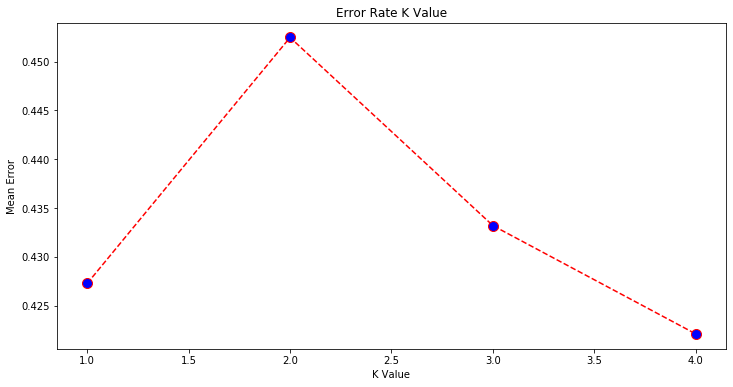

In [41]:
# Done by IT18165180 - Hewagama K G

#### CAUTION #####
####This calculation take much time to execute

# Plotting the figure that comes from previous calculation
# Nothing wii be change in other models by this
plt.figure(figsize=(12, 6))
plt.plot(range(4, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [77]:
# Done by IT18164404 - Suwandarachchi T D

# Separate the datasets as Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(vectorization_out, client_simplified, test_size=0.25, random_state=0)


# Train the model using Naive Bayes
classifier_naive = MultinomialNB()
classifier_naive.fit(X_train, y_train)

predictions_naive = classifier_naive.predict(X_test)

# Calculate the confusion matrix and identify the model performance
print(confusion_matrix(y_test,predictions_naive))
print(classification_report(y_test,predictions_naive))
print(accuracy_score(y_test, predictions_naive))

[[ 217  252  125    0]
 [   8 3053  478    0]
 [  18  916 2149    1]
 [   9   98  237   36]]
              precision    recall  f1-score   support

           0       0.86      0.37      0.51       594
           1       0.71      0.86      0.78      3539
           2       0.72      0.70      0.71      3084
           3       0.97      0.09      0.17       380

    accuracy                           0.72      7597
   macro avg       0.81      0.50      0.54      7597
weighted avg       0.74      0.72      0.70      7597

0.7180465973410557


In [ ]:
# Done by IT18052466 - Alwis P L D N 

# Separate the datasets as Train and Test dataset
#X_train, X_test, y_train, y_test = train_test_split(vectorization_out, client_simplified, test_size=0.25, random_state=0)


# Trian model uisng Support Vector Machine
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)

predictions_svm = classifier_linear.predict(X_test)

# Calculate the confusion matrix and identify the model performance
print(confusion_matrix(y_test,predictions_svm))
print(classification_report(y_test,predictions_svm))
print(accuracy_score(y_test, predictions_svm))

In [1]:
print('Accuracy for all three models' + '\n')
print('KNN model :- ' + '0.5898')
print('Naive Bayes Model :- ' + '0.7180')
print('SVM model :- ' + '0.776' + '\n')
print('Among all three models, the best model is an SVM model because the accuracy is higher than other models.')

Accuracy for all three models

KNN model :- 0.5898
Naive Bayes Model :- 0.7180
SVM model :- 0.776

Among all three models, the best model is an SVM model because the accuracy is higher than other models.


In [8]:
print("Q : How can you improve the performance of your models?\n")
print("A : Step 1: Adding more data to the dataset")
print("A : Step 2: Identify with missing values, outlier values and replace or fix them correctly")
print("A : Step 3: Select best feature selection")
print("A : Step 4: Test the dataset with multiple Algotithms")
print("A : Step 5: Tune the best algorithm that select from step 4 till get the hightest accuracy value")
print("A : Step 6: Combine the predictions from multiple models")
print("A : Step 7: Must use cross validation technique; training set(0.75) and testing set(0.25)")

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

Q : How can you improve the performance of your models?

A : Step 1: Adding more data to the dataset
A : Step 2: Identify with missing values, outlier values and replace or fix them correctly
A : Step 3: Select best feature selection
A : Step 4: Test the dataset with multiple Algotithms
A : Step 5: Tune the best algorithm that select from step 4 till get the hightest accuracy value
A : Step 6: Combine the predictions from multiple models
A : Step 7: Must use cross validation technique; training set(0.75) and testing set(0.25)
